# Using K Nearest Neighbors (KNN) Classifier

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Datset

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

### Head, Info, Describe to get a brief about the Data

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Visualizing the Data

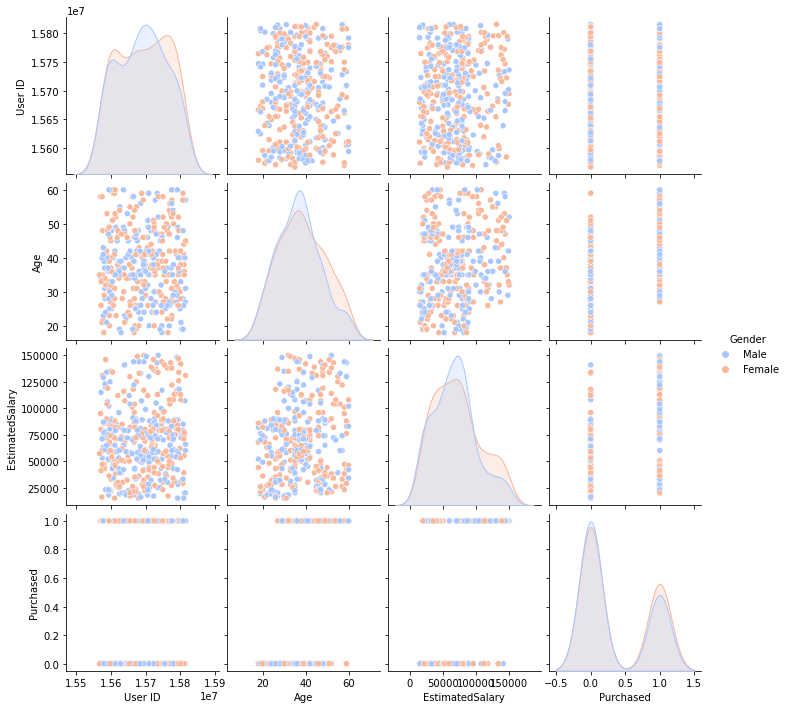

In [6]:
sns.pairplot(data=df,hue='Gender',palette='coolwarm')

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

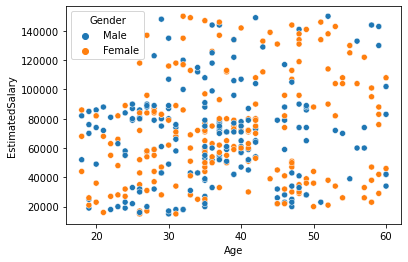

In [7]:
sns.scatterplot(x='Age',y='EstimatedSalary',data=df,hue='Gender')

### Spliting the Data

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### User ID has unique values & Gender has categorical values. So leaving out User ID & Gender Columns

In [9]:
X=df.iloc[:,2:-1]
y=df.iloc[:,-1]

### Importing Train Test Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
X_train

,Age,EstimatedSalary
237,37,80000
268,47,144000
186,20,82000
106,26,35000
41,33,51000
...,...,...
63,32,120000
326,41,72000
337,35,79000
11,26,52000


In [12]:
y_train

237    0
268    1
186    0
106    0
41     0
      ..
63     1
326    0
337    0
11     0
351    0
Name: Purchased, Length: 280, dtype: int64

### Applying Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_test

array([[-1.12560115,  0.0676494 ],
       [ 0.12164031,  0.0379134 ],
       [ 0.50540691,  1.88154533],
       [-0.6458929 ,  0.0379134 ],
       [-0.35806795, -0.79469457],
       [ 1.08105681,  0.1271214 ],
       [-1.60530941, -0.0512946 ],
       [ 0.21758196, -0.31891859],
       [-0.93371785, -1.12179056],
       [-1.89313436,  0.48395338],
       [-0.07024299,  2.20864132],
       [ 1.46482342,  1.01920136],
       [-0.35806795,  1.34629735],
       [-0.74183455,  0.57316138],
       [-0.07024299,  0.30553739],
       [-0.4540096 , -0.79469457],
       [-0.07024299,  2.00048933],
       [ 0.79323186, -0.31891859],
       [ 0.02569866,  0.0379134 ],
       [ 0.98511516, -1.21099856],
       [ 0.12164031,  1.91128133],
       [ 0.98511516,  1.82207333],
       [ 0.40946526, -0.17023859],
       [-0.07024299,  0.21632939],
       [ 0.12164031,  0.21632939],
       [-1.79719271, -1.44888655],
       [-1.79719271, -1.32994255],
       [ 1.94453167, -0.67575057],
       [ 0.88917351,

### Training the K Nearest Neighbors Classifier Model with Training Data

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

### Predicting the K Nearest Neighbors Classifier Model with Testing Data

In [16]:
pred=knn.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [18]:
print(confusion_matrix(y_test,pred))

[[67 13]
 [ 6 34]]


In [19]:
print(accuracy_score(y_test,pred))

0.8416666666666667


### K Nearest Neighbors Classifier Model with default K value, predicted with an accuracy of 84.16%

#### Choosing the best K value, with lesser Error Rate :

In [20]:
error_rate=[]

for i in range(1,60):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

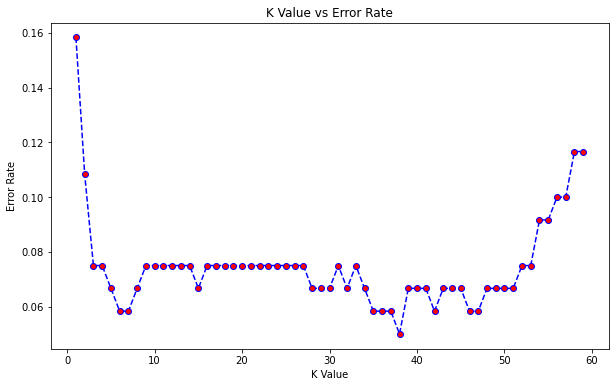

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red')
plt.title('K Value vs Error Rate')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

### Corresponding to Low Error Rate, Let's take K =38 

In [25]:
knn_final=KNeighborsClassifier(n_neighbors=38)
knn_final.fit(X_train,y_train)
pred_final=knn_final.predict(X_test)

In [26]:
print(confusion_matrix(y_test,pred_final))

[[76  4]
 [ 2 38]]


In [27]:
accuracy_score(y_test,pred_final)

0.95

### K Nearest Neighbors Classifier Model with the best K value predicted with an accuracy of 95%